In [2]:
import pandas as pd
import os 
import numpy as np
import dask.dataframe as dd
import dask.multiprocessing
dask.config.set(scheduler='processes')
import time

import dask.array as da
import dask.bag as db

In [86]:
targetLocation = '/media/ak/Data1/ProcessedFuturesData'
es_target_location = os.path.join(targetLocation, 'ES')
os.listdir(targetLocation)

['CL', 'ES', 'FLG', 'FTSE', 'JNI', 'STXE']

In [3]:
CL = '/media/ak/Data1/TradesPurchased/CL'
CL_csv = sorted([f for f in os.listdir(CL) if str('.gz') not in f])
CL_file_idx = 1
file_loc = os.path.join(CL, CL_csv[CL_file_idx])

In [76]:
# we are just picking one file here # 
ES = '/media/ak/Data1/TradesPurchased/ES'
ES_csv = sorted([f for f in os.listdir(ES) if str('.gz') not in f])
ES_file_idx = 1
ES_file_date = ES_csv[ES_file_idx]
es_file_loc = os.path.join(ES, ES_csv[ES_file_idx])

'ESM2019.csv'

In [8]:
start = time.time()
cl_dask_df = dd.read_csv(file_loc, assume_missing=True)
es_dask_df = dd.read_csv(es_file_loc, assume_missing=True)

end = time.time()
print("Read csv with dask: ",(end-start),"sec")


Read csv with dask:  0.2530505657196045 sec


In [ ]:
#get list of dates from the file

In [9]:
cl_dates = list(cl_dask_df['Date'].values.compute())
es_dates =list(cl_dask_df['Date'].values.compute())

In [10]:
cl_unique_dates = np.unique(cl_dates)
es_unique_dates = np.unique(es_dates)

In [105]:
unique_date_idx = 3
dt =pd.to_datetime(es_unique_dates[unique_date_idx])
dt_save_format = dt.strftime('%Y%m%d')+'.csv'
print(dt_save_format)

20190505.csv


In [21]:
df_cl = cl_dask_df[cl_dask_df.Date == cl_unique_dates[0] ].compute()
df_es = es_dask_df[es_dask_df.Date == es_unique_dates[0] ].compute()

In [14]:
unique_quotes_cl = len(np.unique(df_quotes_cl.Time))
unique_quotes_es =len(np.unique(df_quotes_es.Time))

In [24]:
df_trades_es = df_quotes_es[df_es.Type == "Trade"]
df_quotes_es = df_quotes_es[df_es.Type == "Quote"]


In [88]:
import sys
df_trades_es.drop(['Bid Price', 'Bid Size','Ask Price', 'Ask Size'], 1)

/home/ak/anaconda3/envs/timeSeries/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Date,Time,Type,Price,Volume
0,05/01/2019,00:00:00.348670,Trade,2959.00,1.0
1,05/01/2019,00:00:00.349414,Trade,2959.00,1.0
3,05/01/2019,00:00:00.436745,Trade,2959.25,5.0
11,05/01/2019,00:00:12.433271,Trade,2959.25,2.0
13,05/01/2019,00:00:12.469263,Trade,2959.25,2.0
...,...,...,...,...,...
461924,05/01/2019,23:59:34.014686,Trade,2925.00,1.0
461934,05/01/2019,23:59:35.202813,Trade,2924.75,1.0
461958,05/01/2019,23:59:44.850330,Trade,2924.75,1.0
461978,05/01/2019,23:59:52.774827,Trade,2925.00,1.0


In [32]:
df_quotes_es.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2529010 entries, 2 to 462022
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Time       object 
 2   Type       object 
 3   Price      float64
 4   Volume     float64
 5   Bid Price  float64
 6   Bid Size   float64
 7   Ask Price  float64
 8   Ask Size   float64
dtypes: float64(6), object(3)
memory usage: 192.9+ MB


In [38]:
df_quotes_es =df_quotes_es.drop(['Price', 'Volume','Type'], 1)

/home/ak/anaconda3/envs/timeSeries/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [65]:
df_trades_es_processed = df_trades_es.groupby('Time', as_index=False, sort=True)['Date','Price','Volume'].mean()

/home/ak/anaconda3/envs/timeSeries/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [66]:
df_quotes_es_processed = df_quotes_es.groupby('Time', as_index=False, sort=True)['Date','Bid Price','Bid Size','Ask Price','Ask Size'].mean()

/home/ak/anaconda3/envs/timeSeries/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


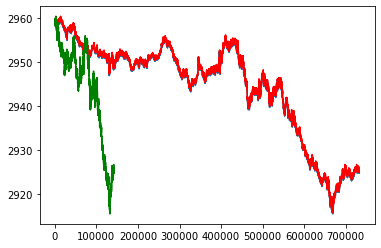

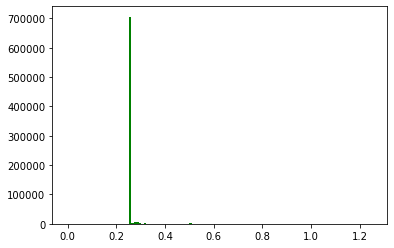

In [68]:
import matplotlib.pyplot as plt
plt.plot(df_quotes_es_processed['Bid Price'])

plt.plot(df_quotes_es_processed['Ask Price'], color ='r')
plt.plot(df_trades_es_processed['Price'], color ='g')
plt.show()
_=plt.hist((df_quotes_es_processed['Ask Price'] - df_quotes_es_processed['Bid Price']), color ='g', bins =120)

,Date,Time,Type,Price,Volume,Bid Price,Bid Size,Ask Price,Ask Size
0,05/01/2019,00:00:00.348670,Trade,2959.00,1.0,NaN,NaN,NaN,NaN
1,05/01/2019,00:00:00.349414,Trade,2959.00,1.0,NaN,NaN,NaN,NaN
3,05/01/2019,00:00:00.436745,Trade,2959.25,5.0,NaN,NaN,NaN,NaN
11,05/01/2019,00:00:12.433271,Trade,2959.25,2.0,NaN,NaN,NaN,NaN
13,05/01/2019,00:00:12.469263,Trade,2959.25,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
461924,05/01/2019,23:59:34.014686,Trade,2925.00,1.0,NaN,NaN,NaN,NaN
461934,05/01/2019,23:59:35.202813,Trade,2924.75,1.0,NaN,NaN,NaN,NaN
461958,05/01/2019,23:59:44.850330,Trade,2924.75,1.0,NaN,NaN,NaN,NaN
461978,05/01/2019,23:59:52.774827,Trade,2925.00,1.0,NaN,NaN,NaN,NaN


In [ ]:
quotes_df = pd.merge_asof(
                    qt_tmp_df[qt_tmp_df['type'] == 'BID'].dropna().fillna("ffill").sort_values('TradeTime')
                    , qt_tmp_df[qt_tmp_df['type'] == 'ASK'].dropna().fillna("ffill").sort_values('TradeTime'),
                    on='TradeTime', allow_exact_matches=True)

In [28]:
df_trades = dask_df[dask_df.Type == 'Trade' ].compute()

In [25]:
df_trades_non_NaN = df_trades[df_trades.Price != 'NaN']

In [35]:
df_trades[df_trades.Date == list_unique_dates[4]]

,Date,Time,Type,Price,Volume,Bid Price,Bid Size,Ask Price,Ask Size
1093294,05/06/2019,00:02:52.239165,Trade,NaN,1.0,NaN,NaN,NaN,NaN
1093404,05/06/2019,00:03:13.634651,Trade,NaN,1.0,NaN,NaN,NaN,NaN
1093490,05/06/2019,00:05:18.727492,Trade,NaN,1.0,NaN,NaN,NaN,NaN
1093519,05/06/2019,00:05:19.315540,Trade,NaN,1.0,NaN,NaN,NaN,NaN
1096601,05/06/2019,00:31:30.533025,Trade,NaN,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1194961,05/06/2019,18:27:51.913642,Trade,NaN,1.0,NaN,NaN,NaN,NaN
1194962,05/06/2019,18:27:52.961693,Trade,NaN,1.0,NaN,NaN,NaN,NaN
1198976,05/06/2019,20:00:00.493930,Trade,NaN,3.0,NaN,NaN,NaN,NaN
1199023,05/06/2019,20:00:01.313984,Trade,NaN,2.0,NaN,NaN,NaN,NaN


In [95]:
targetLocation = '/media/ak/Data1/ProcessedFuturesData' 
os.listdir(targetLocation)
test_location = os.path.join(targetLocation, 'ES')

In [101]:
files =os.listdir(test_location)
pd.read_csv(os.path.join(test_location, files[1]))

,Time,Price,Volume
0,00:00:00.348670,2959.00,1.0
1,00:00:00.349414,2959.00,1.0
2,00:00:00.436745,2959.25,5.0
3,00:00:12.433271,2959.25,2.0
4,00:00:12.469263,2959.25,2.0
...,...,...,...
142327,23:59:34.014686,2925.00,1.0
142328,23:59:35.202813,2924.75,1.0
142329,23:59:44.850330,2924.75,1.0
142330,23:59:52.774827,2925.00,1.0


In [98]:
import multiprocessing
print(multiprocessing.cpu_count())

16
